
# 3D spherically symmetric harmonic oscillator

In [1]:
import numpy as np
import lagrange_basis.laguerre as lbase

import matplotlib.pyplot as plt

In [2]:
# mesh size
mesh_size = 50
scale = 0.05

mesh = lbase.mesh_points(mesh_size)
print("Roots:\n",mesh)

# using Laguerre polynomials with \alpha = 0
lambdas = lbase.lambdas(mesh_size)
print("Lambdas: \n", lambdas)

print("Scaled mesh:\n",scale*mesh)

Roots:
 [  2.86305183e-02   1.50882936e-01   3.70948782e-01   6.89090700e-01
   1.10562502e+00   1.62096175e+00   2.23561038e+00   2.95018337e+00
   3.76539977e+00   4.68208939e+00   5.70119757e+00   6.82379091e+00
   8.05106367e+00   9.38434531e+00   1.08251090e+01   1.23749816e+01
   1.40357546e+01   1.58093972e+01   1.76980709e+01   1.97041465e+01
   2.18302233e+01   2.40791514e+01   2.64540578e+01   2.89583760e+01
   3.15958810e+01   3.43707300e+01   3.72875106e+01   4.03512976e+01
   4.35677203e+01   4.69430440e+01   5.04842680e+01   5.41992449e+01
   5.80968280e+01   6.21870542e+01   6.64813739e+01   7.09929448e+01
   7.57370115e+01   8.07314048e+01   8.59972111e+01   9.15596904e+01
   9.74495656e+01   1.03704891e+02   1.10373859e+02   1.17519198e+02
   1.25225470e+02   1.33612028e+02   1.42858325e+02   1.53260372e+02
   1.65385643e+02   1.80698344e+02]
Lambdas: 
 [  0.07347863   0.17111331   0.2690584    0.36727788   0.46585902
   0.56489929   0.66449998   0.76476578   0.8658052

In [3]:
# plotting vars
xplot = 0.02*(np.asarray(range(0,1000))) + 1e-6

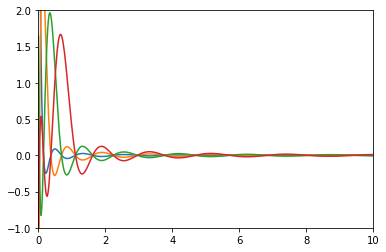

In [4]:
# check basis function
plt.plot(xplot,lbase.basis_func(xplot,0,mesh))
plt.plot(xplot,lbase.basis_func(xplot,1,mesh))
plt.plot(xplot,lbase.basis_func(xplot,2,mesh))
plt.plot(xplot,lbase.basis_func(xplot,3,mesh))
plt.axis([0, 10, -1.0, 2.0])
plt.show()

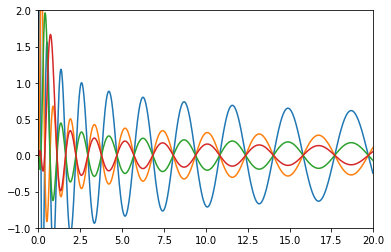

In [5]:
# check regularized basis functions
plt.plot(xplot,lbase.basis_func_regularized_x(xplot,0,mesh))
plt.plot(xplot,lbase.basis_func_regularized_x(xplot,1,mesh))
plt.plot(xplot,lbase.basis_func_regularized_x(xplot,2,mesh))
plt.plot(xplot,lbase.basis_func_regularized_x(xplot,3,mesh))
plt.axis([0, 20, -1.0, 2.0])
plt.show()

In [7]:
def potential_hosc_cfb(mesh, l):
  return 0.5*np.multiply(mesh, mesh) + 0.5*l*(l + 1)/np.multiply(mesh, mesh)

def hamiltonian(angmom, mesh, scale, kinetic, potential):
  msize = mesh.size
  
  ham = np.zeros([msize, msize])
  for row in range(0,msize):
    for col in range(0, msize):
      ham[row, col] = -0.5*kinetic(row, col, mesh)/np.power(scale,2)
      if(row == col):
        ham[row, col] = ham[row, col] + potential(scale*mesh[row], angmom)
  
  return ham

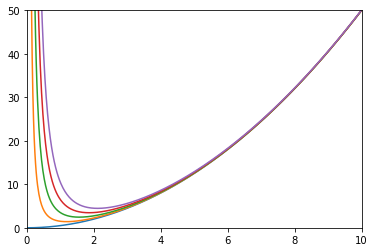

In [7]:
# check potential
plt.figure(1)
for amom in range(0,5):
  pot = potential(xplot, amom)
  plt.plot(xplot,pot)
plt.axis([0, 10.0, 0, 50.0])
plt.show()

Angular momentum:  0 
Eigenvalues:
 [  1.50000000e+00   3.50000000e+00   5.50000000e+00   7.50000000e+00
   9.50000000e+00   1.15000000e+01   1.35000000e+01   1.55000000e+01
   1.75000000e+01   1.95000000e+01   2.15000000e+01   2.35000000e+01
   2.55000000e+01   2.75000001e+01   2.94999975e+01   3.14999880e+01
   3.34999545e+01   3.54957038e+01   3.75058912e+01   3.92556685e+01
   4.08002277e+01   4.25417042e+01   4.40356825e+01   4.79301201e+01
   5.27164236e+01   5.83724659e+01   6.49883320e+01   7.27000418e+01
   8.16876289e+01   9.21827857e+01   1.04482437e+02   1.18968916e+02
   1.36139125e+02   1.56646810e+02   1.81364780e+02   2.11478296e+02
   2.48628717e+02   2.95140706e+02   3.54393459e+02   4.31450531e+02
   5.34176604e+02   6.75324211e+02   8.76687891e+02   1.17804683e+03
   1.65842521e+03   2.49370244e+03   4.14385157e+03   8.15376669e+03
   2.27083383e+04   2.04640649e+05]


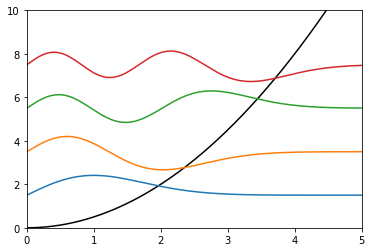

Angular momentum:  1 
Eigenvalues:
 [  2.50000000e+00   4.50000000e+00   6.50000000e+00   8.50000000e+00
   1.05000000e+01   1.25000000e+01   1.45000000e+01   1.65000000e+01
   1.85000000e+01   2.05000000e+01   2.25000000e+01   2.45000000e+01
   2.65000000e+01   2.85000000e+01   3.04999890e+01   3.25000367e+01
   3.44987908e+01   3.64957405e+01   3.84821523e+01   3.99136321e+01
   4.19918525e+01   4.28518713e+01   4.58471377e+01   5.02028239e+01
   5.54101214e+01   6.15249492e+01   6.86613668e+01   7.69764819e+01
   8.66743469e+01   9.80165676e+01   1.11338899e+02   1.27075400e+02
   1.45793318e+02   1.68243968e+02   1.95438269e+02   2.28761366e+02
   2.70151157e+02   3.22384783e+02   3.89554571e+02   4.77891260e+02
   5.97257093e+02   7.64011901e+02   1.00690776e+03   1.38030060e+03
   1.99721340e+03   3.12521300e+03   5.52886524e+03   1.21583300e+04
   4.30608991e+04   6.87196196e+05]


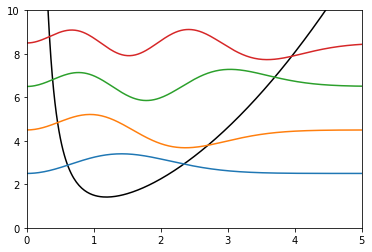

Angular momentum:  2 
Eigenvalues:
 [  3.50000000e+00   5.50000000e+00   7.50000000e+00   9.50000000e+00
   1.15000000e+01   1.35000000e+01   1.55000000e+01   1.75000000e+01
   1.95000000e+01   2.15000000e+01   2.35000000e+01   2.55000000e+01
   2.75000000e+01   2.94999978e+01   3.14999881e+01   3.34999694e+01
   3.54959791e+01   3.75054789e+01   3.92790150e+01   4.08246907e+01
   4.25875364e+01   4.40145369e+01   4.78900435e+01   5.26582764e+01
   5.82948607e+01   6.48888848e+01   7.25753216e+01   8.15329420e+01
   9.19918024e+01   1.04246620e+02   1.18676668e+02   1.35774499e+02
   1.56187548e+02   1.80779234e+02   2.10720497e+02   2.47630221e+02
   2.93796642e+02   3.52537707e+02   4.28809489e+02   5.30278311e+02
   6.69307954e+02   8.66873105e+02   1.16085852e+03   1.62536640e+03
   2.42132399e+03   3.95211574e+03   7.46338201e+03   1.83042186e+04
   7.81495637e+04   1.66193139e+06]


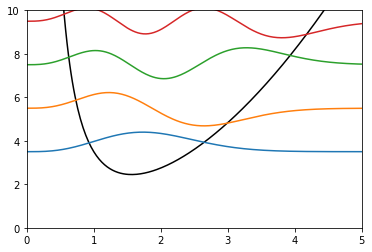

In [9]:
# diagonalization
for amom in range(0,3):
  evals, evecs = np.linalg.eig(hamiltonian(amom, mesh, scale, lbase.me_ddx_exact_regularized_x, potential_hosc_cfb))
  
  idx = evals.argsort()
  evals = evals[idx]
  evecs = evecs[:,idx]
  
  for state in range(0,evals.size):
    if(evecs[0,state] < 0):
      evecs[:,state] = -1*evecs[:,state]

  print("Angular momentum: ",amom,"\nEigenvalues:\n",evals)
  plt.plot(xplot, potential(xplot, amom), 'k-')
  plt.axis([0, 5.0, 0, 10.0])
  for state in range(0,4):
    plt.plot(xplot,evals[state] + lbase.wave_function(evecs[:,state], xplot, mesh, lbase.basis_func_regularized_x, scale))
  plt.show()